# SPOTIFY TOP 50

![Logowik](https://logowik.com/content/uploads/images/spotify-black1673.jpg)

While it's often highlighted how musical styles evolve over time, certain elements like tempo show remarkable consistency, especially in popular music. Despite the evolution of genres and production techniques, the tempo of popular music has maintained a certain uniformity across different eras. Below, we explore such consistencies in contemporary music. 

In [19]:
import pandas as pd

# Load the dataset
spotify_df_global = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')

# Calculate the 95th and 99th percentile values for Popularity
percentile_95 = spotify_df_global['Popularity'].quantile(0.95)
percentile_99 = spotify_df_global['Popularity'].quantile(0.99)

# Filter the dataset to include only the rows within the 95th to 99th percentile
filtered_data = spotify_df_global[(spotify_df_global['Popularity'] >= percentile_95) & (spotify_df_global['Popularity'] <= percentile_99)]

# Define the feature columns for which to calculate the mean
feature_columns = ['danceability', 'energy', 'valence', 'tempo']

# Calculate the mean of each feature within the filtered data
mean_scores = filtered_data[feature_columns].mean()

print("Mean Scores of Features in the 95th to 99th Percentile of Popularity:")
print(mean_scores)


Mean Scores of Features in the 95th to 99th Percentile of Popularity:
danceability      0.705667
energy            0.617667
valence           0.569000
tempo           105.339333
dtype: float64


In [20]:
import pandas as pd

spotify_df_global = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')

bottom_scores_global = spotify_df_global[spotify_df_global['Popularity'].between(70,80)]

feature_columns = ['danceability', 'energy', 'valence', 'tempo']  # Adjust if needed

print(bottom_scores_global[[ 'Popularity'] + feature_columns])


    Popularity  danceability  energy  valence    tempo
26          77         0.599   0.946    0.747  151.647
31          78         0.464   0.745    0.262  180.098


In [21]:
spotify_df_2000 = pd.read_csv('Spotify-2000.csv')
spotify_df_median = spotify_df_2000[['Danceability', 'Energy', 'Valence', 'Beats Per Minute (BPM)']].median()
print(spotify_df_median)

spotify_df_global_median = spotify_df_global[['danceability', 'energy', 'valence', 'tempo']].median()
print(spotify_df_global_median)

Danceability               53.0
Energy                     61.0
Valence                    47.0
Beats Per Minute (BPM)    119.0
dtype: float64
danceability      0.664
energy            0.637
valence           0.569
tempo           120.026
dtype: float64


In [22]:
import pandas as pd

# Load the datasets
spotify_df_2000 = pd.read_csv('Spotify-2000.csv')
spotify_df_global = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')

  
# Scale up the normalized median values for Danceability, Energy, and Valence
scaled_median_2000s = spotify_df_median[['Danceability', 'Energy', 'Valence']] * 1  # Multiply by 100 to match the original scale

# Ensure that the Top 50 Median Scores are correctly scaled for consistency (excluding Tempo)
scaled_median_top50 = spotify_df_global_median[['danceability', 'energy', 'valence']] * 100

# Add Tempo back to the DataFrame without scaling
scaled_median_2000s['Tempo'] = spotify_df_median['Beats Per Minute (BPM)']
scaled_median_top50['Tempo'] = spotify_df_global_median['tempo']

# Create a DataFrame to compare the scaled medians
comparison_df = pd.DataFrame({
    '2000s Median Scores': scaled_median_2000s.values,
    'Top 50 Median Scores': scaled_median_top50.values
})

# Adjust index to match the features' names
comparison_df.index = ['Danceability', 'Energy', 'Valence', 'Tempo']

# Display the comparison
print(comparison_df)


              2000s Median Scores  Top 50 Median Scores
Danceability                 53.0                66.400
Energy                       61.0                63.700
Valence                      47.0                56.900
Tempo                       119.0               120.026


<Figure size 1000x600 with 0 Axes>

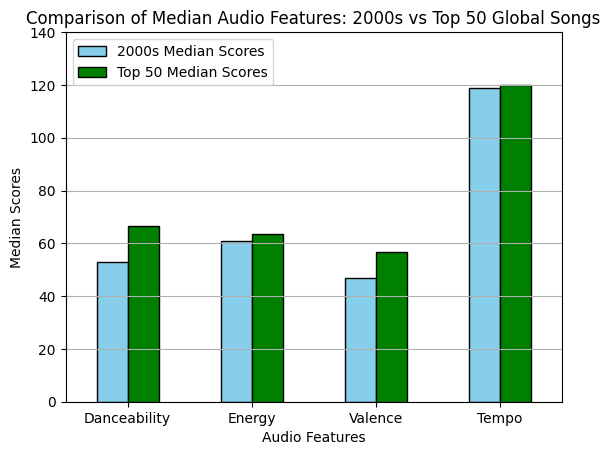

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

comparison_df = pd.DataFrame({
    '2000s Median Scores': scaled_median_2000s.values,
    'Top 50 Median Scores': scaled_median_top50.values
})
comparison_df.index = ['Danceability', 'Energy', 'Valence', 'Tempo']

# Plotting the comparison
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', color=['skyblue', 'green'], edgecolor='black')

plt.title('Comparison of Median Audio Features: 2000s vs Top 50 Global Songs')
plt.xlabel('Audio Features')
plt.ylabel('Median Scores')
plt.xticks(rotation=0)
plt.ylim(0, max(comparison_df.max()) + 20)  # Set y-axis limit slightly above the maximum value
plt.grid(axis='y')

plt.show()


              2000s Mean Scores  Top 50 Mean Scores
Danceability          53.238215            66.30200
Energy                59.679539            64.13000
Valence               49.408726            56.15160
Tempo                120.215647           123.91218


<Figure size 1000x600 with 0 Axes>

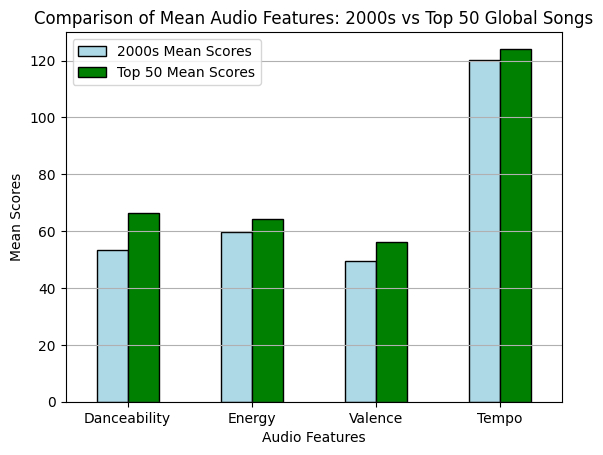

In [24]:

spotify_df_2000 = pd.read_csv('Spotify-2000.csv')
spotify_df_global = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')

# Calculate the mean for each feature in the Spotify 2000 dataset
mean_2000s = spotify_df_2000[['Danceability', 'Energy', 'Valence', 'Beats Per Minute (BPM)']].mean()

# Calculate the mean for each feature in the Top 50 Global dataset
mean_top50 = spotify_df_global[['danceability', 'energy', 'valence', 'tempo']].mean()

# Scale only 'danceability', 'energy', and 'valence' but not 'tempo'
scaled_mean_top50 = mean_top50.copy()
scaled_mean_top50[['danceability', 'energy', 'valence']] *= 100

# Create a DataFrame to compare the means
mean_comparison_df = pd.DataFrame({
    '2000s Mean Scores': mean_2000s.values,
    'Top 50 Mean Scores': scaled_mean_top50.values
})

# Adjust index to match the features' names
mean_comparison_df.index = ['Danceability', 'Energy', 'Valence', 'Tempo']

# Display the comparison DataFrame
print(mean_comparison_df)
# Adjust index to match the features' names
mean_comparison_df.index = ['Danceability', 'Energy', 'Valence', 'Tempo']

# Plotting the comparison
plt.figure(figsize=(10, 6))
mean_comparison_df.plot(kind='bar', color=['lightblue', 'green'], edgecolor='black')

plt.title('Comparison of Mean Audio Features: 2000s vs Top 50 Global Songs')
plt.xlabel('Audio Features')
plt.ylabel('Mean Scores')
plt.xticks(rotation=0)
plt.ylim(0, 130)  # Set y-axis limit to 120
plt.grid(axis='y')

plt.show()

The bar charts highlight differences in median and mean scores for Danceability, Energy, Valence, and Tempo.

This bar chart vividly illustrates the tempo variations among these top tracks, which do not vary widely, suggesting a consistency in tempo among the most popular songs globally.


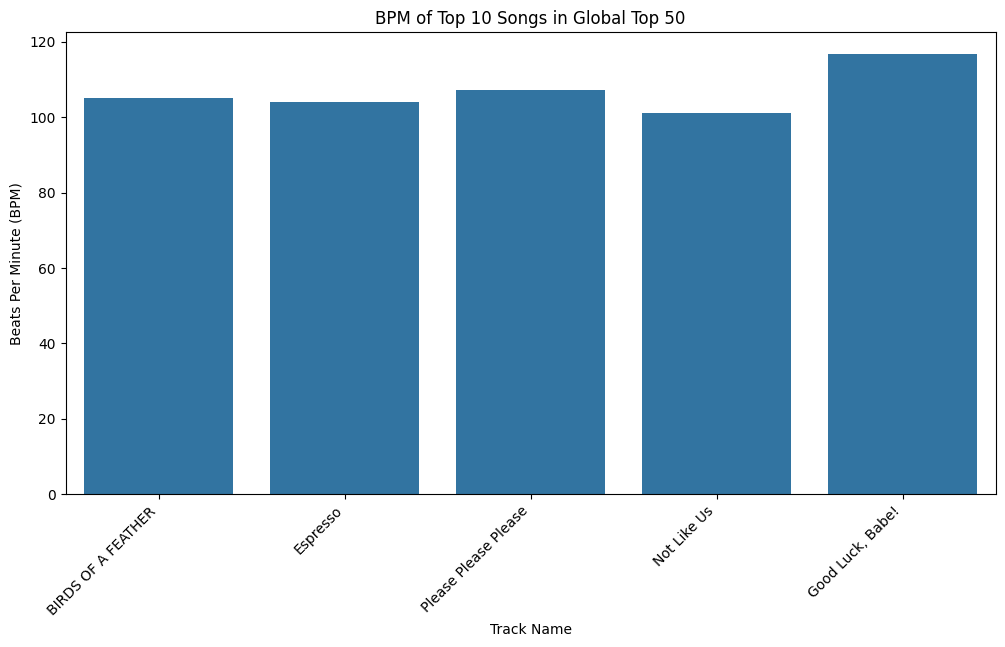

In [25]:
top50_df = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')

# Extract the top 10 songs based on popularity
top_10_songs = top50_df.nlargest(5, 'Popularity')

plt.figure(figsize=(12, 6))

# Bar plot for BPM
sns.barplot(x=top_10_songs['Track Name'], y=top_10_songs['tempo'])

plt.title('BPM of Top 10 Songs in Global Top 50')
plt.xlabel('Track Name')
plt.ylabel('Beats Per Minute (BPM)')
plt.xticks(rotation=45, ha='right')

plt.show()


These two figures were created after extracting the top 5 songs from both datasets. Despite the variability present for the larger dataset, it is imperative to observe that trends point to higher BPMs being prioritized across datasets. 

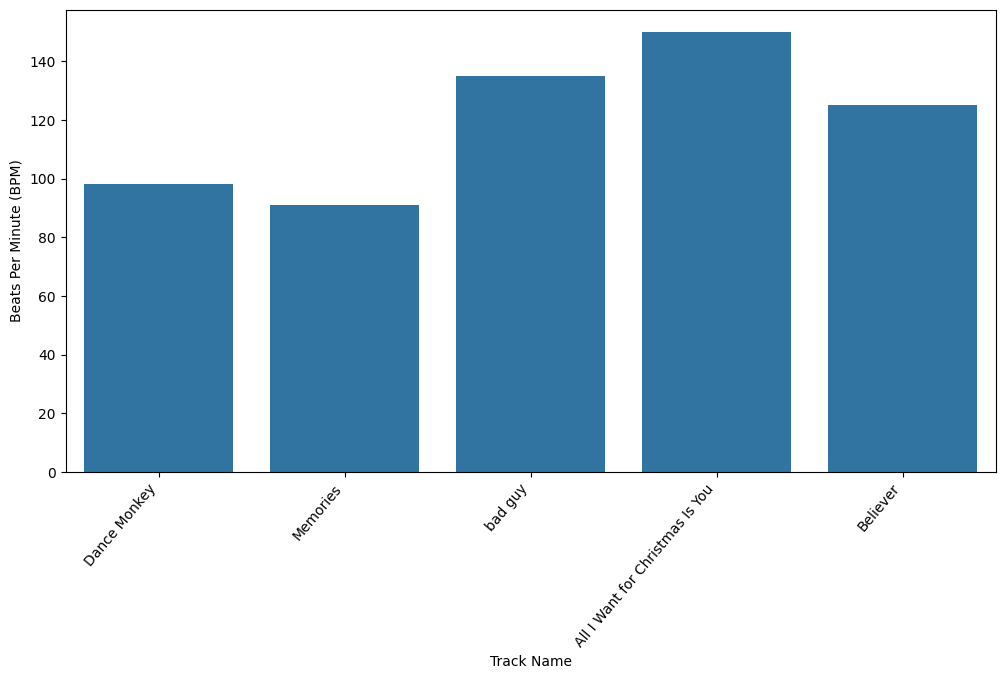

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spotify_df = pd.read_csv('Spotify-2000.csv')

# Extract the top 10 songs based on popularity
top_10_songs =spotify_df.nlargest(5, 'Popularity')

# Create a plot
plt.figure(figsize=(12, 6))

# Bar plot for BPM
sns.barplot(x=top_10_songs['Title'], y=top_10_songs['Beats Per Minute (BPM)'])


# Adding titles and labels
plt.xlabel('Track Name')
plt.ylabel('Beats Per Minute (BPM)')
plt.xticks(rotation=50, ha='right')

plt.show()


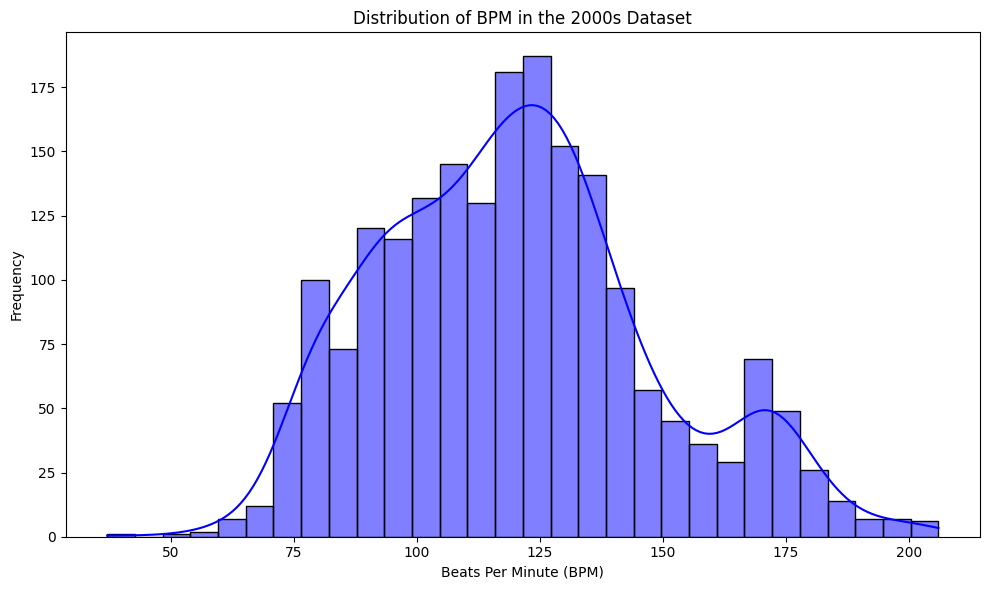

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spotify_df_2000 = pd.read_csv('Spotify-2000.csv')

# Plot the distribution of BPM in the 2000s dataset
plt.figure(figsize=(10, 6))
sns.histplot(spotify_df_2000['Beats Per Minute (BPM)'], bins=30, kde=True, color='blue')

# Adding titles and labels
plt.title('Distribution of BPM in the 2000s Dataset')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

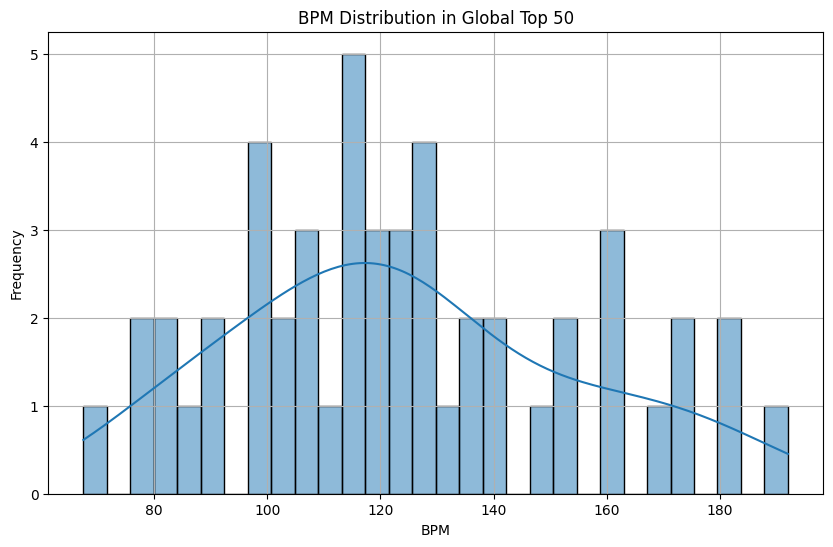

tempo
116.034    1
104.978    1
103.969    1
107.071    1
116.712    1
128.027    1
101.061    1
99.986     1
105.029    1
80.969     1
Name: count, dtype: int64


In [28]:
# Histogram to visualize the distribution of BPM
plt.figure(figsize=(10, 6))
sns.histplot(top50_df['tempo'], bins=30, kde=True)
plt.title('BPM Distribution in Global Top 50')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Analyzing common BPM peaks
bpm_peaks = top50_df['tempo'].value_counts().sort_values(ascending=False)
print(bpm_peaks.head(10))

Conversely, distributions were generated for all music available in both datasets, in effortds to visualize which particularly tempos produced the most success. Given that both datasets already depict popular music, it is evident that most songs cluster among the 100-140 tempo. 